# **Latihan Konversi Pandas Dataframe**

## **Tentang**
Ini adalah latihan dari salah satu materi di [Dicoding](https://www.dicoding.com/). 
## **Tujuan**
Tujuan dari latihan ini adalah untuk belajar menggunakan library Pandas.

## **Import Data**
Latihan ini menggunakan sampel data yang disediakan oleh Google Colab.

In [77]:
import os
os.listdir("sample_data")
import pandas as pd
df = pd.read_csv("sample_data/california_housing_train.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# **Data Preparation dengan Normalization dan Standardization**

## **Deteksi Missing Value**

Kesalahan nilai (*missing value*) merupakan kesalahan pada data seperti kesalahan format data, nilai kosong (*null values*).

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


Semua kolom pada dataset memiliki tipe data `float64`.

In [79]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

Tidak ada nilai kosong (*null values*) pada dataset.

## **Deteksi Outlier**
Outlier merupakan nilai yang jauh berbeda dari kumpulan nilai lainnya pada data. Kehadiran outlier dapat mengacaukan hasil dari sebuah analisis statistik. 
Kolom `housing_median_age` dan `median_income` akan dideteksi outlier dengan menggunakan boxplot.

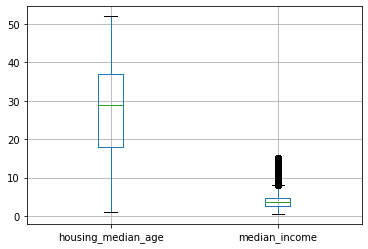

In [80]:
df.boxplot(["housing_median_age","median_income"])

Terlihat kolom `median_income` memiliki beberapa outlier.

## **Penghapusan Outlier**
Berikut adalah langkah-langkah untuk menghapus outlier.\


1.   Kalkulasi kuartil pertama dan ketiga ($Q1$ dan $Q3$)
2.   Kemudian, hitung jarak antarkuartil, $IQR = Q3 - Q1$
3. Hitung jarak minimal antarkuartil, $\text{min } IQR = Q1 - 1.5 \times IQR$
4. Hitung jarak maksimal antarkuartil, $\text{max } IQR = Q3 + 1.5 \times IQR$
5. Replace data yang terletak $\text{min } IQR$ dan diatas $\text{max } IQR$ dengan NULL value.



In [81]:
# Import library numpy untuk kalkulasi percentile
import numpy as np

# Mencari Q1 dan Q3
Q1 = np.percentile(df["median_income"],25)
Q3 = np.percentile(df["median_income"],75)

# Mencari min_IQR dan max_IQR
IQR = Q3 - Q1
min_IQR = Q1 - (1.5 * IQR)
max_IQR = Q3 + (1.5 * IQR)

df_bottom_outlier = (df <= min_IQR)
df_top_outlier = (df >= max_IQR)

# Menyimpan dataset bebas outlier
df = df[df_top_outlier["median_income"] == False]

## **Normalization**
Kolom `housing_median_age` dan `median_income` akan dilakukan normalisasi untuk memperoleh data dengan skala yang sama menggunakan `MinMaxScaler`

In [82]:
# Import library sklearn untuk MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["housing_median_age_norm","median_income_norm"]] = scaler.fit_transform(df[["housing_median_age","median_income"]])
df[["housing_median_age","median_income","housing_median_age_norm","median_income_norm"]].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,housing_median_age,median_income,housing_median_age_norm,median_income_norm
0,15.0,1.4936,0.274510,0.131372
1,19.0,1.8200,0.352941,0.174524
2,17.0,1.6509,0.313725,0.152168
3,14.0,3.1917,0.254902,0.355870
4,20.0,1.9250,0.372549,0.188406


## **Standardization**
Standardization merupakan proses konversi nilai-nilai dari suatu fitur agar memiliki skala yang sama.
Metode yang paling populer untuk standardization adalah z score.

$$z=\frac{value-mean}{standard \ deviation}$$

Fungsi standardization sebenarnya mirip dengan normalization. Keduanya memiliki tujuan untuk menyamakan skala nilai dari tiap atribut pada data.

Dalam latihan ini akan digunakan library preprocessing dari scikit learn untuk melakukan standardization.

In [83]:
# Import preprocessing
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
df[["housing_median_age_std","median_income_std"]] = scaler.fit_transform(df[["housing_median_age","median_income"]])
df[["housing_median_age","median_income","housing_median_age_std","median_income_std"]].head()

,housing_median_age,median_income,housing_median_age_std,median_income_std
0,15.0,1.4936,-1.086044,-1.452260
1,19.0,1.8200,-0.766997,-1.234371
2,17.0,1.6509,-0.926520,-1.347254
3,14.0,3.1917,-1.165806,-0.318690
4,20.0,1.9250,-0.687235,-1.164278
